In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# MovieLens 데이터 불러오기

In [2]:
ratings_df=pd.read_csv('ratings.csv')
tags_df=pd.read_csv('tags.csv')
movies_df=pd.read_csv("movies.csv")

In [3]:
print(ratings_df.shape)
print(movies_df.shape)

(100836, 4)
(9742, 3)


# 장르 분석하기

- 전체 장르 파악하기

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [6]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Horror', 'Action', 'Drama', 'Documentary', 'Musical', 'Children', 'War', 'Crime', 'Romance', 'Film-Noir', 'Thriller', 'Animation', 'Adventure', 'IMAX', 'Fantasy', 'Western', 'Comedy', '(no genres listed)', 'Sci-Fi', 'Mystery']


In [7]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Horror,Action,Drama,Documentary,Musical,Children,War,Crime,Romance,Film-Noir,Thriller,Animation,Adventure,IMAX,Fantasy,Western,Comedy,(no genres listed),Sci-Fi,Mystery
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ct = 0
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies_df.loc[movie_id]['genres'].split('|')
    
    genres_df.loc[movie_id][list_of_genres] = 1

In [9]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)
print(genres_df.shape)
print(genres_df)

(9742, 21)
      Horror  Action  Drama  Documentary  Musical  Children  War  Crime  \
0          0       0      0            0        0         1    0      0   
1          0       0      0            0        0         1    0      0   
2          0       0      0            0        0         0    0      0   
3          0       0      1            0        0         0    0      0   
4          0       0      0            0        0         0    0      0   
...      ...     ...    ...          ...      ...       ...  ...    ...   
9737       0       1      0            0        0         0    0      0   
9738       0       0      0            0        0         0    0      0   
9739       0       0      1            0        0         0    0      0   
9740       0       1      0            0        0         0    0      0   
9741       0       0      0            0        0         0    0      0   

      Romance  Film-Noir  ...  Animation  Adventure  IMAX  Fantasy  Western  \
0        

- get_dummies 활용하기

In [10]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 특정 장르의 평점과 user 분석

In [12]:
movies_df.columns

Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [13]:
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.index

Int64Index([   0,   12,   44,  205,  272,  322,  483,  488,  506,  511,
            ...
            9667, 9683, 9708, 9729, 9732, 9733, 9735, 9737, 9738, 9740],
           dtype='int64', length=611)

In [14]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df

,userId,movieId,rating,timestamp
28,1,527,5.0,964984002
35,1,596,5.0,964982838
39,1,673,3.0,964981775
42,1,780,3.0,964984086
98,1,1517,5.0,964981107
...,...,...,...,...
100040,610,8142,5.0,1479545324
100064,610,8874,5.0,1479542569
100065,610,8910,3.5,1493849401
100072,610,8983,3.5,1493845284


In [15]:
# user는 animation장르의 영화에 대해 다음과 같은 평점을 부여
animation_df.groupby('userId')['rating'].mean()

userId
1      4.400000
3      2.500000
4      2.200000
5      4.333333
6      3.666667
         ...   
606    3.656863
607    4.333333
608    3.092105
609    3.000000
610    3.795455
Name: rating, Length: 525, dtype: float64

# 장르간 상관관계

In [16]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<AxesSubplot:>

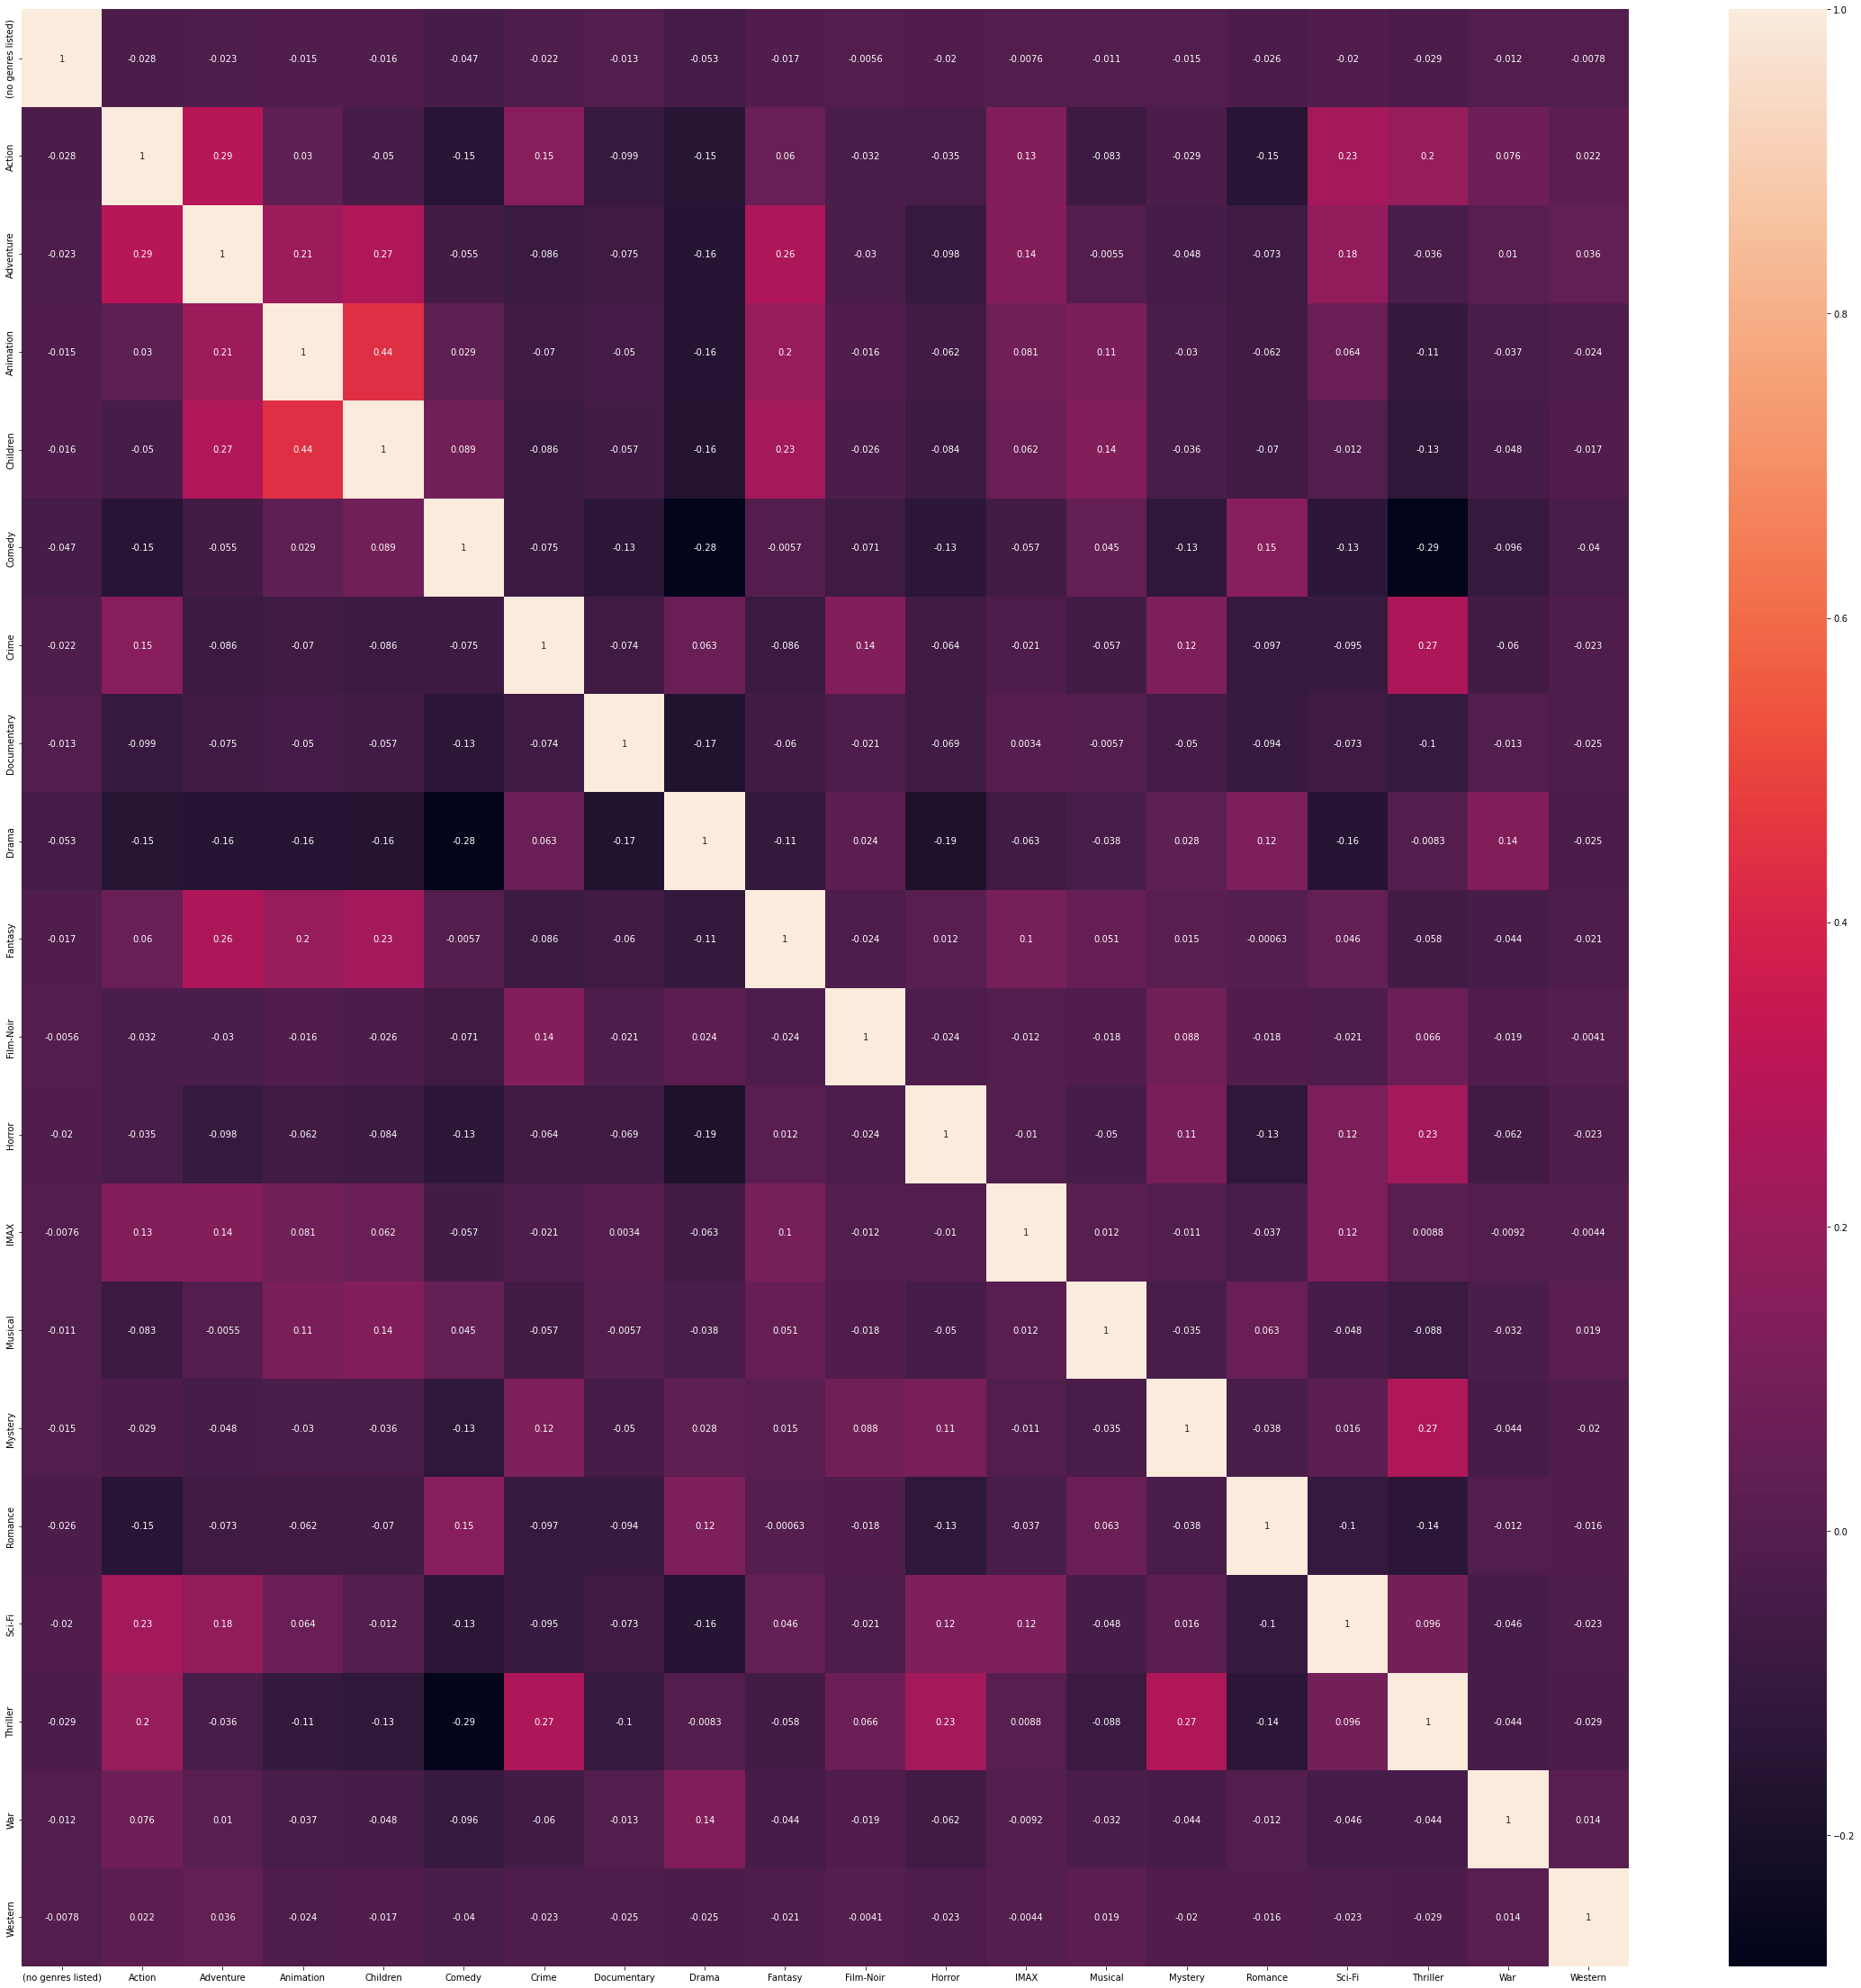

In [17]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

# 영화 이름, 연도 분석

In [18]:
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
title_df = movies_df[['title', 'genres']]
title_df.head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [20]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

C:\Users\nadai\AppData\Local\Temp/ipykernel_14140/2731121795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')


,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,Father of the Bride Part II (1995),Comedy,(1995)


- 혹시 연도가 제대로 표시가 안되어있는 영화도 있을 수 있으니 nan 확인

In [21]:
title_df.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [22]:
title_df[title_df['year'].isnull()]

,title,genres,year
6059,Babylon 5,Sci-Fi,NaN
9031,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,Hyena Road,(no genres listed),NaN
9138,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,Nocturnal Animals,Drama|Thriller,NaN
9259,Paterson,(no genres listed),NaN
9367,Moonlight,Drama,NaN
9448,The OA,(no genres listed),NaN
9514,Cosmos,(no genres listed),NaN
9515,Maria Bamford: Old Baby,(no genres listed),NaN


In [23]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화는 드랍할 수 있다.
title_df[title_df.genres == '(no genres listed)'].shape

(34, 3)

In [24]:
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\nadai\AppData\Local\Temp/ipykernel_14140/525838784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))


,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),Comedy,1995


# 연도별 영화 데이터 분석

In [25]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [26]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

In [27]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

# 영화와 개봉연도, 그리고 평점

In [28]:
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
title_df

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,Flint (2017),Drama,2017
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [30]:
title_df[title_df['year'] == '2017']

,title,genres,year
8687,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
8688,Justice League (2017),Action|Adventure|Sci-Fi,2017
8692,Black Panther (2017),Action|Adventure|Sci-Fi,2017
8694,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,2017
8695,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,2017
...,...,...,...
9728,Liquid Truth (2017),Drama,2017
9731,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,2017
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017


In [31]:
# 2017년 영화 평점 평균
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()

3.0

In [32]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,NaN
92,1903,NaN
105,1908,NaN
84,1915,3.250000
87,1916,3.408451
...,...,...
100,2014,3.441830
101,2015,3.398833
102,2016,3.375000
103,2017,3.000000


array([[<AxesSubplot:title={'center':'avg_ratings'}>]], dtype=object)

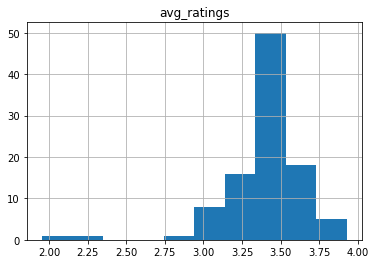

In [33]:
result_df.hist()